<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 60px; border-radius: 15px; text-align: center; box-shadow: 0 10px 30px rgba(0,0,0,0.3);'>
    <h1 style='color: white; font-size: 48px; margin: 0; font-weight: 700; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>Stroke Prediction Analysis</h1>
    <p style='color: #f0f0f0; font-size: 20px; margin-top: 20px; font-weight: 300;'>Comprehensive Data Exploration and Health Risk Assessment</p>
    <div style='margin-top: 30px; padding: 20px; background: rgba(255,255,255,0.1); border-radius: 10px; backdrop-filter: blur(10px);'>
        <p style='color: white; font-size: 16px; margin: 5px;'><strong>Dataset:</strong> Stroke Prediction Dataset (Kaggle)</p>
        <p style='color: white; font-size: 16px; margin: 5px;'><strong>Analysis Focus:</strong> Health Metrics & Risk Factors</p>
    </div>
</div>

<div style='background: linear-gradient(to right, #0e4984ff, #0e4984ff); padding: 30px; border-left: 5px solid #667eea; border-radius: 10px; margin: 30px 0;'>
    <h2 style='color: #eab366ff; margin-top: 0;'>Table of Contents</h2>
    <ol style='font-size: 16px; line-height: 2;'>
        <li><strong>Data Exploration</strong> - Initial dataset investigation</li>
        <li><strong>Data Cleaning</strong> - Handling missing values and inconsistencies</li>
        <li><strong>Exploratory Data Analysis</strong> - Univariate and bivariate analysis</li>
        <li><strong>Interactive Visualizations</strong> - Plotly-based visual insights</li>
        <li><strong>Key Findings & Report</strong> - Summary of insights</li>
    </ol>
</div>

---

<div style='background: #667eea; padding: 20px; border-radius: 10px;'>
    <h2 style='color: white; margin: 0;'>Section 1: Data Exploration</h2>
</div>

### 1.1 Import Required Libraries

We begin by importing all necessary libraries for data manipulation, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### 1.2 Define Color Palette

Establishing a consistent color scheme using complementary colors for professional and cohesive visualizations.

In [2]:
COLOR_PALETTE = {
    'primary': '#667eea',
    'secondary': '#764ba2',
    'accent': '#f093fb',
    'success': '#4facfe',
    'warning': '#fa709a',
    'danger': '#ff6b6b',
    'info': '#4ecdc4',
    'light': '#f8f9fa',
    'dark': '#2c3e50'
}
GRADIENT_COLORS = ['#667eea', '#764ba2', '#f093fb', '#fa709a']

### 1.3 Load Dataset

Loading the stroke prediction dataset and performing initial inspection.

In [3]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset shape: 5110 rows × 12 columns


### 1.4 Initial Data Inspection

Examining the first few rows to understand the dataset structure and content.

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
5,56669,Male,81.000,0,0,Yes,Private,Urban,186.210,29.000,formerly smoked,1
6,53882,Male,74.000,1,1,Yes,Private,Rural,70.090,27.400,never smoked,1
7,10434,Female,69.000,0,0,No,Private,Urban,94.390,22.800,never smoked,1
8,27419,Female,59.000,0,0,Yes,Private,Rural,76.150,NaN,Unknown,1
9,60491,Female,78.000,0,0,Yes,Private,Urban,58.570,24.200,Unknown,1


### 1.5 Dataset Information

Comprehensive overview of column types, non-null counts, and memory usage.

In [5]:
print("-" *40)
print("DATASET INFORMATION")
print("-" * 40)
df.info()

----------------------------------------
DATASET INFORMATION
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 1.6 Column Overview

Detailed breakdown of each column including data type and unique values.

In [6]:
column_summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

print("Column Summary:")
display(column_summary)

Column Summary:


,Column,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Values
0,id,int64,5110,0,0.000,5110
1,gender,object,5110,0,0.000,3
2,age,float64,5110,0,0.000,104
3,hypertension,int64,5110,0,0.000,2
4,heart_disease,int64,5110,0,0.000,2
5,ever_married,object,5110,0,0.000,2
6,work_type,object,5110,0,0.000,5
7,Residence_type,object,5110,0,0.000,2
8,avg_glucose_level,float64,5110,0,0.000,3979
9,bmi,float64,4909,201,3.933,418


### 1.7 Descriptive Statistics

Statistical summary of numerical features including central tendency and spread.

In [7]:
print(" Descriptive statistics")
df.describe().T

 Descriptive statistics


,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


### 1.8 Categorical Variables Analysis

Examining unique values and distributions in categorical features.

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print("Categorical Variables:")
print("=" * 100)

for col in categorical_cols:
    print("-" * 50)
    print(df[col].value_counts().to_string())

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Categorical Variables:
--------------------------------------------------
gender
Female    2994
Male      2115
Other        1
--------------------------------------------------
ever_married
Yes    3353
No     1757
--------------------------------------------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
--------------------------------------------------
Residence_type
Urban    2596
Rural    2514
--------------------------------------------------
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789


In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
print(numerical_cols)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [10]:
df['stroke'].unique()

array([1, 0])

### 1.9 Data Quality Assessment

Identifying potential issues: missing values, duplicates, and outliers.

In [11]:
print("1. MISSING VALUES:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).values
})
display(missing_data)
print("2. DUPLICATE ROWS:")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


1. MISSING VALUES:


,Column,Missing Count,Missing Percentage
0,id,0,0.000
1,gender,0,0.000
2,age,0,0.000
3,hypertension,0,0.000
4,heart_disease,0,0.000
5,ever_married,0,0.000
6,work_type,0,0.000
7,Residence_type,0,0.000
8,avg_glucose_level,0,0.000
9,bmi,201,3.933


2. DUPLICATE ROWS:
Number of duplicate rows: 0


### Check the minimum and maximum values for each numerical feature to detect potential outliers


In [12]:
numerical_bound = pd.DataFrame({
    'Column': ['age', 'avg_glucose_level', 'bmi'],
    'Min': df[['age', 'avg_glucose_level', 'bmi']].min().values,
    'Max': df[['age', 'avg_glucose_level', 'bmi']].max().values})
numerical_bound

,Column,Min,Max
0,age,0.080,82.000
1,avg_glucose_level,55.120,271.740
2,bmi,10.300,97.600


### Show percentage distribution of classes in 'stroke'


In [13]:
df['stroke'].value_counts(normalize=True) * 100


,proportion
stroke,
0,95.127
1,4.873


<div style='background: linear-gradient(to right, #a82857ff, #a82857ff); padding: 20px; border-left: 5px solid #4caf50; border-radius: 10px; margin: 30px 0;'>
    <h3 style='color: #b6af44ff; margin-top: 0;'>Exploration Summary</h3>
    <p style='font-size: 16px; line-height: 1.8;'>
        <strong>Key Findings from Initial Exploration:</strong><br>
        • The dataset contains health and demographic information for stroke prediction<br>
        • Missing values are present in BMI and potentially other columns<br>
        • The target variable (stroke) shows significant class imbalance<br>
        • Numerical features include age, glucose level, and BMI<br>
        • Categorical features include gender, work type, residence type, and smoking status
    </p>
</div>

---

<div style='background: #764ba2; padding: 20px; border-radius: 10px;'>
    <h2 style='color: white; margin: 0;'>Section 2: Data Cleaning</h2>
</div>

### 2.1 Create a Copy for Cleaning

Preserving the original dataset while performing cleaning operations.

In [14]:
df_clean = df.copy()

### 2.2 Handle Missing BMI Values

BMI values are missing for some patients. We'll impute these using median values grouped by age categories to maintain demographic patterns.

In [15]:
bmi_missing_count = df_clean['bmi'].isnull().sum()
print(f"Missing BMI values: {bmi_missing_count} ({bmi_missing_count/len(df_clean)*100:.2f}%)")
df_clean['age_group'] = pd.cut(df_clean['age'],
                                bins=[0, 18, 35, 50, 65, 100],
                                labels=['<18', '18-35', '36-50', '51-65', '65+'])
df_clean['bmi'] = df_clean.groupby(['age_group', 'gender'])['bmi'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)
print(f"Remaining missing BMI values: {df_clean['bmi'].isnull().sum()}")

Missing BMI values: 201 (3.93%)
Remaining missing BMI values: 0


### 2.3 Handle Smoking Status

The 'Unknown' category in smoking status will be retained as it represents a legitimate data category indicating unavailable information.

In [16]:
print("Smoking Status Distribution:")
print(df_clean['smoking_status'].value_counts())
print(f"Percentage with 'Unknown' status: {(df_clean['smoking_status'] == 'Unknown').sum()/len(df_clean)*100:.2f}%")

Smoking Status Distribution:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
Percentage with 'Unknown' status: 30.22%


### 2.6 Handle Outliers Analysis

Identifying potential outliers in numerical features

In [17]:
print(f"Highest bmi {df_clean['bmi'].max()}")
print(f"lowest bmi {df_clean['bmi'].min()}")
low_bmi = df_clean[df_clean['bmi'] < 12].shape[0]
high_bmi = df_clean[df_clean['bmi'] > 60].shape[0]
print(f"Values with BMI < 12 : {low_bmi}")
print(f"Values with BMI > 60 : {high_bmi}")

Highest bmi 97.6
lowest bmi 10.3
Values with BMI < 12 : 3
Values with BMI > 60 : 13


### Remove BMI values that are medically implausible (less than 12 or greater than 60)


In [18]:
df_clean = df_clean[(df_clean['bmi'] >= 12) & (df_clean['bmi'] <= 60)]

In [19]:
print(f"Highest avg_glucose_level {df_clean['avg_glucose_level'].max()}")
print(f"Lowest avg_glucose_level {df_clean['avg_glucose_level'].min()}")
low_glucose = df_clean[df_clean['avg_glucose_level'] < 50].shape[0]
high_glucose = df_clean[df_clean['avg_glucose_level'] > 400].shape[0]
print(f"Values with Glucose < 50: {low_glucose}")
print(f"Values with Glucose > 400: {high_glucose}")

Highest avg_glucose_level 271.74
Lowest avg_glucose_level 55.12
Values with Glucose < 50: 0
Values with Glucose > 400: 0


In [20]:
# Drop category 'Other' from gender
df_clean = df_clean.drop(df_clean[df_clean['gender'] == 'Other'].index, axis=0)

### 2.7 Remove Temporary Columns

Cleaning up helper columns created during the cleaning process.

In [21]:
df_clean = df_clean.drop('age_group', axis=1)

<div style='background: linear-gradient(to right, #065777ff, #065777ff); padding: 20px; border-left: 5px solid #4caf50; border-radius: 10px; margin: 30px 0;'>
    <h3 style='color: #0c9e30ff; margin-top: 0;'>Cleaning Summary</h3>
    <p style='font-size: 16px; line-height: 1.8;'>
        <strong>Data Cleaning Completed:</strong><br>
        • BMI missing values imputed using age group and gender median<br>
        • Smoking status 'Unknown' category retained as informative<br>
        • Data types corrected for all columns<br>
        • Duplicate records removed<br>
        • Outliers identified and retained for medical validity<br>
         Drop category 'Other' from gender<br>
        • Cleaned dataset exported successfully
    </p>
</div>

---

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 10px;'>
    <h2 style='color: white; margin: 0;'>Section 3: Exploratory Data Analysis (EDA)</h2>
</div>

### 3.1 Target Variable Distribution

Analyzing the distribution of stroke occurrence in the dataset.

In [22]:
stroke_counts = df_clean['stroke'].value_counts()
fig = go.Figure(data=[go.Pie(
    labels=['No Stroke', 'Stroke'],
    values=stroke_counts.values,
    hole=0.4,
    marker=dict(colors=[COLOR_PALETTE['info'], COLOR_PALETTE['danger']],
                line=dict(color='white', width=2)),
    textinfo='label+percent+value',
    textfont=dict(size=14),
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
)])
fig.show()
print(f"\nClass Distribution:")
print(f"No Stroke: {stroke_counts[0]} ({stroke_counts[0]/len(df_clean)*100:.2f}%)")
print(f"Stroke: {stroke_counts[1]} ({stroke_counts[1]/len(df_clean)*100:.2f}%)")
print(f"Imbalance Ratio: {stroke_counts[0]/stroke_counts[1]:.2f}:1")


Class Distribution:
No Stroke: 4844 (95.11%)
Stroke: 249 (4.89%)
Imbalance Ratio: 19.45:1


### 3.2 Univariate Analysis - Numerical Features

Examining the distribution of continuous variables: age, glucose level, and BMI.

In [23]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
feature_labels = ['Age (years)', 'Average Glucose Level (mg/dL)', 'Body Mass Index (BMI)']
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f'<b>{label}</b>' for label in feature_labels] +
                    [f'<b>{label} - Box Plot</b>' for label in feature_labels],
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)
colors = [COLOR_PALETTE['primary'], COLOR_PALETTE['secondary'], COLOR_PALETTE['accent']]
for i, (col, color) in enumerate(zip(numerical_features, colors)):
    fig.add_trace(
        go.Histogram(
            x=df_clean[col],
            name=feature_labels[i],
            marker_color=color,
            opacity=0.75,
            showlegend=False
        ),
        row=1, col=i+1
    )
for i, (col, color) in enumerate(zip(numerical_features, colors)):
    fig.add_trace(
        go.Box(
            y=df_clean[col],
            name=feature_labels[i],
            marker_color=color,
            showlegend=False
        ),
        row=2, col=i+1
    )
fig.update_layout(
    title=dict(text='<b>Distribution of Numerical Features</b>',
                font=dict(size=26, color=COLOR_PALETTE['dark'])),
    height=800,
    showlegend=False,
    paper_bgcolor='rgba(248, 249, 250, 1)',
    plot_bgcolor='white'
)

fig.show()
print("\nStatistical Summary of Numerical Features:")
print("=" * 100)
display(df_clean[numerical_features].describe())


Statistical Summary of Numerical Features:


,age,avg_glucose_level,bmi
count,5093.000,5093.000,5093.000
mean,43.234,106.164,28.779
std,22.624,45.293,7.419
min,0.080,55.120,12.000
25%,25.000,77.280,23.700
50%,45.000,91.890,28.200
75%,61.000,114.050,32.800
max,82.000,271.740,59.700


### 3.3 Univariate Analysis - Categorical Features

Visualizing the distribution of categorical variables.

In [24]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[f'<b>{col.replace("_", " ").title()}</b>' for col in categorical_features],
    specs=[[{'type': 'bar'}] * 3] * 3,
    vertical_spacing=0.10,
    horizontal_spacing=0.1,

)
cat_colors = [COLOR_PALETTE['primary'], COLOR_PALETTE['secondary'], COLOR_PALETTE['accent'],
              COLOR_PALETTE['info'], COLOR_PALETTE['warning'], COLOR_PALETTE['success'],
              COLOR_PALETTE['danger']]
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1)]
for i, (col, color, pos) in enumerate(zip(categorical_features, cat_colors, positions)):
    value_counts = df_clean[col].value_counts()
    fig.add_trace(
        go.Bar(
            x=value_counts.index.astype(str),
            y=value_counts.values,
            marker_color=color,
            text=value_counts.values,
            textposition='auto',
            showlegend=False,
            hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
        ),
        row=pos[0], col=pos[1]
    )

fig.update_layout(
    title=dict(text='<b>Distribution of Categorical Features</b>',
    font=dict(size=26, color=COLOR_PALETTE['dark'])),
    height=1000,
    showlegend=False,
    paper_bgcolor='rgba(248, 249, 250, 1)',
    plot_bgcolor='white',

)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()

### 3.5 Correlation Analysis

Examining relationships between numerical variables using correlation heatmap.

In [25]:
import plotly.graph_objects as go
import numpy as np
correlation_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df_clean[correlation_features].corr()
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale=[
        [0, COLOR_PALETTE['info']],
        [0.5, 'white'],
        [1, COLOR_PALETTE['danger']]
    ],
    text=np.round(corr_matrix.values, 2),
    hovertemplate='%{y} vs %{x}<br>Correlation: %{z:.3f}<extra></extra>',
    colorbar=dict(title="Correlation")
))
annotations = []
for i, row in enumerate(corr_matrix.index):
    for j, col in enumerate(corr_matrix.columns):
        annotations.append(dict(
            x=col,
            y=row,
            text=str(round(corr_matrix.loc[row, col], 2)),
            showarrow=False,
            font=dict(color='black', size=12)
        ))

fig.update_layout(
    title=dict(
        text='<b>Correlation Heatmap - Health Metrics and Stroke</b>',
        font=dict(size=26, color=COLOR_PALETTE['dark'])
    ),
    height=600,
    xaxis=dict(side='bottom'),
    paper_bgcolor='rgba(248, 249, 250, 1)',
    plot_bgcolor='white',
    annotations=annotations
)

fig.show()
print("\nCorrelations with Stroke (sorted by absolute value):")

stroke_corr = corr_matrix['stroke'].drop('stroke').sort_values(key=lambda x: abs(x), ascending=False)
for feature, corr in stroke_corr.items():
    print(f"{feature:.<30} {corr:>8.4f}")



Correlations with Stroke (sorted by absolute value):
age...........................   0.2455
heart_disease.................   0.1348
avg_glucose_level.............   0.1321
hypertension..................   0.1290
bmi...........................   0.0452


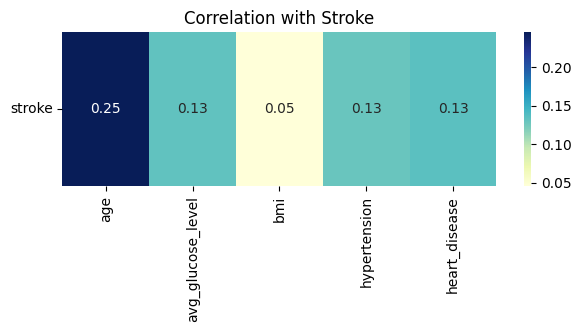

In [26]:
numeric_cols = ['age','avg_glucose_level','bmi','hypertension','heart_disease','stroke']
stroke_corr = df_clean[numeric_cols].corr()['stroke'].drop('stroke')

plt.figure(figsize=(7,2))
sns.heatmap(stroke_corr.to_frame().T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation with Stroke")
plt.yticks(rotation=0)
plt.show()


### 3.6 Stroke Rate by Categorical Features

Analyzing how stroke occurrence varies across different categorical variables.

In [27]:
categorical_analysis = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f'<b>Stroke Rate by {col.replace("_", " ").title()}</b>'
                    for col in categorical_analysis],
    specs=[[{'type': 'bar'}] * 3] * 2,
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

positions = [(1,1), (1,2), (1,3), (2,1), (2,2)]

for i, (col, pos) in enumerate(zip(categorical_analysis, positions)):
    stroke_rate = df_clean.groupby(col)['stroke'].agg(['sum', 'count'])
    stroke_rate['rate'] = (stroke_rate['sum'] / stroke_rate['count'] * 100)

    fig.add_trace(
        go.Bar(
            x=stroke_rate.index.astype(str),
            y=stroke_rate['rate'],
            marker_color=COLOR_PALETTE['danger'],
            text=np.round(stroke_rate['rate'], 2),
            texttemplate='%{text:.1f}%',
            textposition='auto',
            showlegend=False,
            hovertemplate='<b>%{x}</b><br>Stroke Rate: %{y:.2f}%<extra></extra>'
        ),
        row=pos[0], col=pos[1]
    )

fig.update_layout(
    title=dict(text='<b>Stroke Rate Analysis Across Categories</b>',
               font=dict(size=26, color=COLOR_PALETTE['dark'])),
    height=800,
    showlegend=False,
    paper_bgcolor='rgba(248, 249, 250, 1)',
    plot_bgcolor='white'
)

fig.update_yaxes(title_text="Stroke Rate (%)", showgrid=True, gridcolor='lightgray')
fig.update_xaxes(showgrid=False)

fig.show()

### 3.7 Age Distribution and Stroke Risk

Detailed analysis of age as a critical risk factor.

In [28]:
df_clean['age_group'] = pd.cut(df_clean['age'],
                                bins=[0, 20, 30, 40, 50, 60, 70, 100],
                                labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])
age_stroke = df_clean.groupby('age_group')['stroke'].agg(['sum', 'count'])
age_stroke['rate'] = (age_stroke['sum'] / age_stroke['count'] * 100)
fig = make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=['<b>Stroke Rate and Count by Age Group</b>']
)

fig.add_trace(
    go.Bar(
        x=age_stroke.index.astype(str),
        y=age_stroke['count'],
        name='Total Patients',
        marker_color=COLOR_PALETTE['info'],
        opacity=0.6
    ),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(
        x=age_stroke.index.astype(str),
        y=age_stroke['rate'],
        name='Stroke Rate (%)',
        marker_color=COLOR_PALETTE['danger'],
        line=dict(width=3),
        mode='lines+markers',
        marker=dict(size=10)
    ),
    secondary_y=True
)

fig.update_layout(
    title=dict(text='<b>Age Groups: Patient Count and Stroke Rate</b>',
               font=dict(size=26, color=COLOR_PALETTE['dark'])),
    height=500,
    paper_bgcolor='rgba(248, 249, 250, 1)',
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.update_xaxes(title_text="Age Group", showgrid=False)
fig.update_yaxes(title_text="Number of Patients", secondary_y=False, showgrid=True, gridcolor='lightgray')
fig.update_yaxes(title_text="Stroke Rate (%)", secondary_y=True, showgrid=False)

fig.show()

print("\nStroke Rate by Age Group:")

display(age_stroke)


Stroke Rate by Age Group:


,sum,count,rate
age_group,,,
0-20,2,1023,0.196
21-30,0,541,0.000
31-40,6,672,0.893
41-50,15,738,2.033
51-60,49,817,5.998
61-70,49,593,8.263
70+,128,709,18.054


<div style='background: linear-gradient(to right, #e8f5e9, #c8e6c9); padding: 20px; border-left: 5px solid #4caf50; border-radius: 10px; margin: 30px 0;'>
    <h3 style='color: #2e7d32; margin-top: 0;'>EDA Key Insights</h3>
    <p style='font-size: 16px; line-height: 1.8;color:#2e7d32'>
        <strong>Major Findings:</strong><br>
        • Strong positive correlation between age and stroke occurrence<br>
        • Patients with hypertension and heart disease show elevated stroke risk<br>
        • Stroke rate increases significantly after age 50<br>
        • Glucose levels and BMI show moderate association with stroke<br>
        • Married individuals and certain work types exhibit different risk patterns<br>
        • Dataset shows significant class imbalance requiring attention in modeling
    </p>
</div>

In [29]:
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1,61-70
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,30.000,never smoked,1,61-70
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1,70+
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1,41-50
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1,70+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,28.800,never smoked,0,70+
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0,70+
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0,31-40
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0,51-60


In [34]:
df_clean.drop(['id'],axis=1,inplace=True)
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 18, 40, 60, 100], labels=['Child', 'Adult', 'Middle-Aged', 'Senior'])
df_clean['bmi_class'] = pd.cut(df_clean['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_clean['glucose_risk'] = pd.cut(df_clean['avg_glucose_level'], bins=[0, 140, 200, 300], labels=['Normal', 'Prediabetes', 'Diabetes'])

In [35]:
df_clean['age_bmi_interaction'] = df_clean['age'] * df_clean['bmi']
df_clean['cardiovascular_risk_score'] = df_clean['hypertension'] + df_clean['heart_disease']
df_clean['married_and_adult'] = ((df_clean['ever_married'] == 'Yes') & (df_clean['age'] > 18)).astype(int)

In [36]:
categorical_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_class', 'glucose_risk']

In [37]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_to_encode, drop_first=True)

In [38]:
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi_interaction,cardiovascular_risk_score,married_and_adult,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Adult,age_group_Middle-Aged,age_group_Senior,bmi_class_Normal,bmi_class_Overweight,bmi_class_Obese,glucose_risk_Prediabetes,glucose_risk_Diabetes
0,67.000,0,1,228.690,36.600,1,2452.200,1,1,True,True,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True
1,61.000,0,0,202.210,30.000,1,1830.000,0,1,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True
2,80.000,0,1,105.920,32.500,1,2600.000,1,1,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False
3,49.000,0,0,171.230,34.400,1,1685.600,0,1,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False
4,79.000,1,0,174.120,24.000,1,1896.000,1,1,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False
